/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_13992/2266721625.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2008-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Final Cumulative Return of Random Strategy: %1157.44
Final Cumulative Return of Buy & Hold: %4266.18
Final Cumulative Return of Moving Average: %2653.86


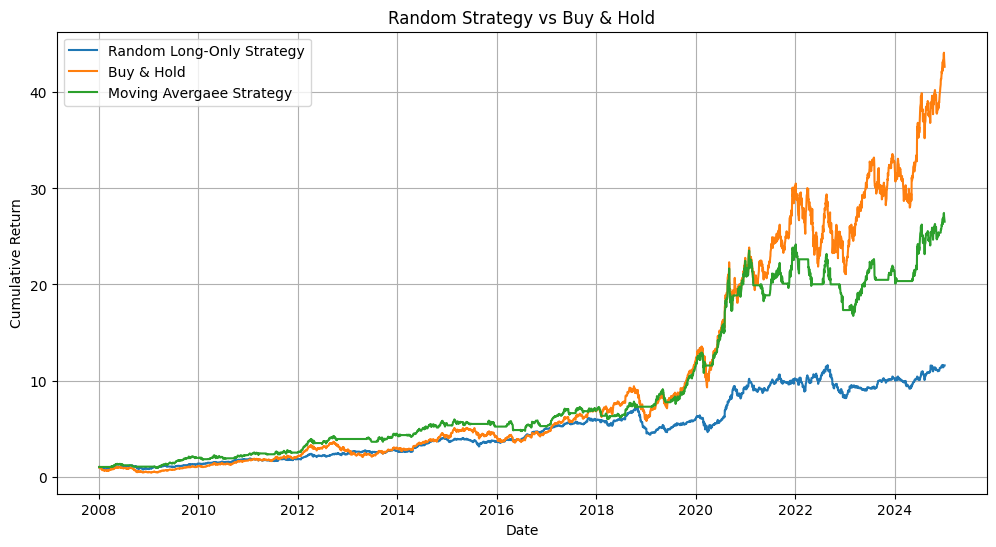

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np


data = yf.download("AAPL", start="2008-01-01", end="2025-01-01")
AAPLdf = pd.DataFrame(data)
np.random.seed(73)  # reproducibility


AAPLdf["quantity"] = np.random.choice([1, 0], size=len(data))


AAPLdf["Signal"] = AAPLdf["quantity"].diff().fillna(0)

#Gets signals for random then moving average
AAPLdf["Signal"] = AAPLdf["Signal"].shift(-1).fillna(0)

short_ma = AAPLdf["Close"].rolling(window=20).mean()
long_ma = AAPLdf["Close"].rolling(window=50).mean()
AAPLdf["ma_signal"] = np.where(short_ma > long_ma, 1, 0)

#Calculate returns
AAPLdf["returns"] = AAPLdf["Close"].pct_change()
AAPLdf["strat_returns"] = AAPLdf["quantity"] * AAPLdf["returns"]
AAPLdf["cum_strat"] = (1 + AAPLdf["strat_returns"]).cumprod()
AAPLdf["Buy_Hold"] = (1 + AAPLdf["returns"]).cumprod()
AAPLdf["ma_daily"] = AAPLdf["ma_signal"] * AAPLdf["returns"]
AAPLdf["MA_returns"] = (1 + AAPLdf["ma_daily"]).cumprod()

print(f"Final Cumulative Return of Random Strategy: %{100*AAPLdf['cum_strat'].iloc[-1]:.2f}")
print(f"Final Cumulative Return of Buy & Hold: %{100*AAPLdf['Buy_Hold'].iloc[-1]:.2f}")
print(f"Final Cumulative Return of Moving Average: %{100*AAPLdf['MA_returns'].iloc[-1]:.2f}")
#Plot the returns
plt.figure(figsize=(12, 6))
plt.plot(AAPLdf.index, AAPLdf["cum_strat"], label="Random Long-Only Strategy")
plt.plot(AAPLdf.index, AAPLdf["Buy_Hold"], label="Buy & Hold")
plt.plot(AAPLdf.index, AAPLdf["MA_returns"], label="Moving Avergaee Strategy")
plt.title("Random Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

# Findings:
# THe buy and Hold method works best. THe random strategy sucks, as expected. The moving average is a 
# lot better than the random but still not as good as the simple Buy and Hold. 
